In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
df_telephone =pd.read_csv("telephone.csv", index_col="date_appel", parse_dates=True)
df_telephone["nombre_entrants_corrige"]  = df_telephone["nombre_entrants_corrige"].str.replace(',','.').astype(float)

In [3]:
# df_telephone = df_telephone.loc["2021":]

In [4]:
# import seaborn as sns


# # Création de la table pivotante
# pivot_table = df_telephone.pivot_table(index='date_appel', columns='famille_entite', values='nombre_entrants_corrige')

# # Calcul de la matrice de corrélation
# corr_matrix = pivot_table.corr()

# # Création du subplot
# plt.figure(figsize=(10, 6))

# # Matrice de corrélation
# sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
# plt.title("Corrélation entre les familles d'entités")
# plt.xlabel("Famille d'entité")
# plt.ylabel("Famille d'entité")
# plt.show()


In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

figure = make_subplots(rows=len(df_telephone.famille.unique()), cols=len(df_telephone.entite.unique()), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.07, horizontal_spacing=0.02,
                    subplot_titles=tuple([f"Entité : {entite}, Famille : {famille}" for entite in df_telephone.entite.unique() for famille in df_telephone.famille.unique()]),
                    column_widths=[0.8/ len(df_telephone.entite.unique())] * len(df_telephone.entite.unique()),
                    row_heights=[0.8/ len(df_telephone.famille.unique())] * len(df_telephone.famille.unique()))

for i, entite in enumerate(df_telephone.famille.unique()):
    for j, famille in enumerate(df_telephone.entite.unique()):
  

        df_vis= df_telephone.loc[(df_telephone.entite == entite) & (df_telephone.famille == famille)]
        filtered_df1 = df_telephone[(df_telephone['entite'] == entite) & (df_telephone['famille'] == famille)].reset_index()
       

        # Ajouter une trace à son propre sous-graphique
        figure.add_trace(
            go.Scatter(x=filtered_df1['date_appel'], y=filtered_df1['nombre_entrants_corrige'],name=f'{entite} - {famille}'),
            row=i+1, col=j+1
        )

        figure.update_yaxes(title_text=f"Nb_appels")

# Mettre à jour les axes
figure.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period",
    title_font=dict(size=10),
    tickfont=dict(size=8)
)

# Augmenter la taille de la figure
figure.update_layout(width=1000, height=3500)


In [12]:

# Concaténer les colonnes "famille" et "entité" avec la fonction concat
df_telephone['famille_entite'] = df_telephone['entite'].astype(str) + ' - ' + df_telephone['famille'].astype(str)


df_telephone = df_telephone.drop(columns=["id","entite","famille"])

In [13]:
df_telephone

,nombre_entrants_corrige,famille_entite
date_appel,,
2019-01-02,165.000000,Entite 1 - F2
2019-01-02,54.000000,Entite 1 - F3
2019-01-02,1.000000,Entite 1 - F4
2019-01-02,99.000000,Entite 1 - F5
2019-01-02,1487.000000,Entite 1 - F6
...,...,...
2023-02-15,708.329712,Entite 5 - F2
2023-02-15,738.935876,Entite 5 - F3
2023-02-15,463.642180,Entite 5 - F5


Pour la famille_entite 'Entite 1 - F2':
Test adf - p-value : 0.018663657475903702
Stationnaire : True




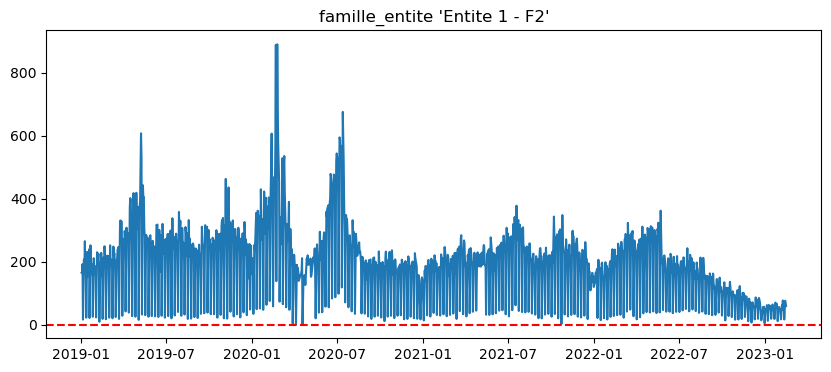

Pour la famille_entite 'Entite 1 - F3':
Test adf - p-value : 0.09424373068829578
Stationnaire : False




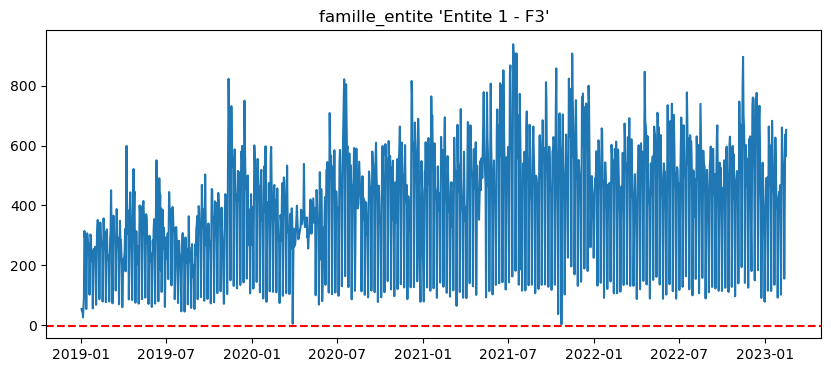

Pour la famille_entite 'Entite 1 - F4':
Test adf - p-value : 8.690473473299617e-17
Stationnaire : True




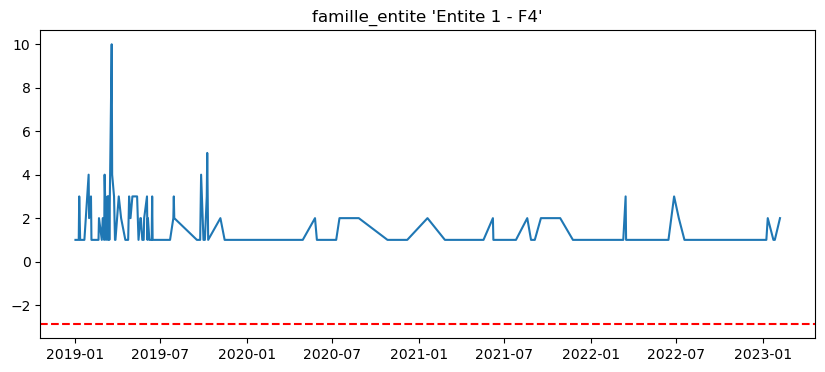

Pour la famille_entite 'Entite 1 - F5':
Test adf - p-value : 0.05947858428917325
Stationnaire : False




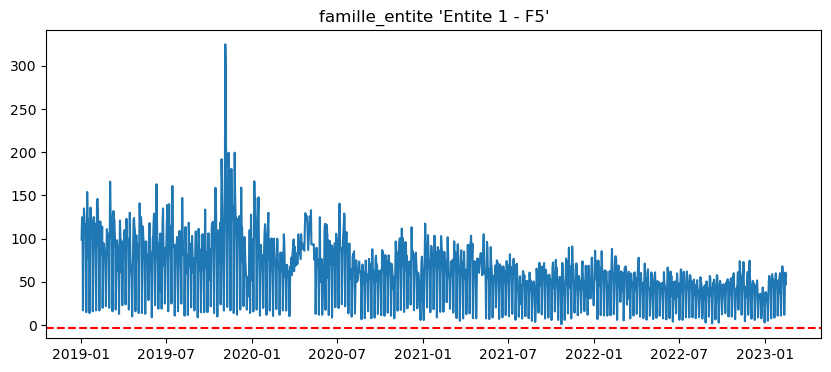

Pour la famille_entite 'Entite 1 - F6':
Test adf - p-value : 0.006068020681321121
Stationnaire : True




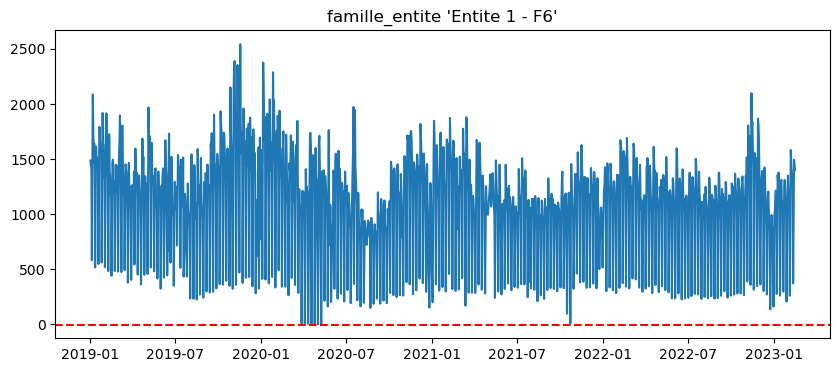

Pour la famille_entite 'Entite 1 - F7':
Test adf - p-value : 0.07286737451620537
Stationnaire : False




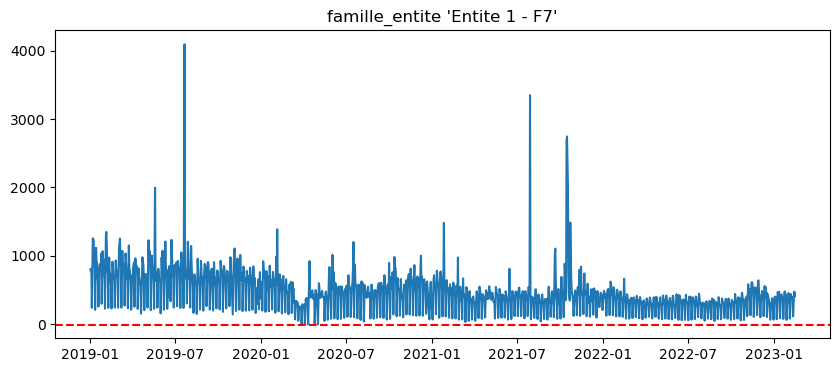

Pour la famille_entite 'Entite 2 - F1':
Test adf - p-value : 0.004572011552042528
Stationnaire : True




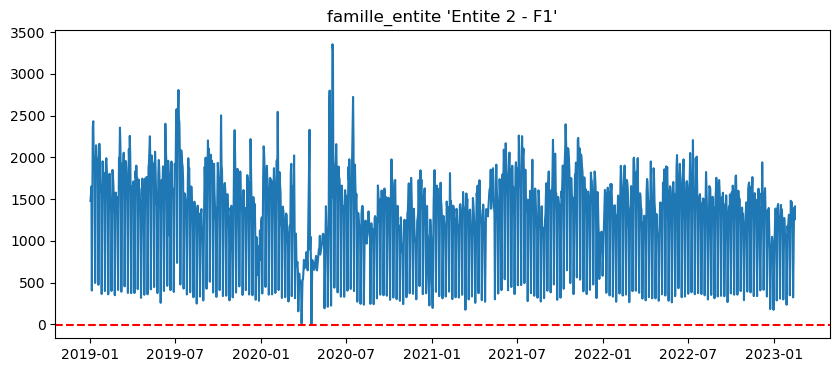

Pour la famille_entite 'Entite 2 - F2':
Test adf - p-value : 0.040400939295738035
Stationnaire : True




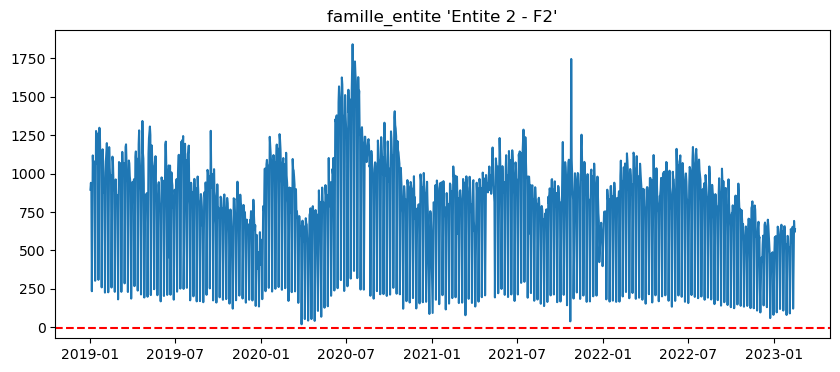

Pour la famille_entite 'Entite 2 - F3':
Test adf - p-value : 0.0035629040117538795
Stationnaire : True




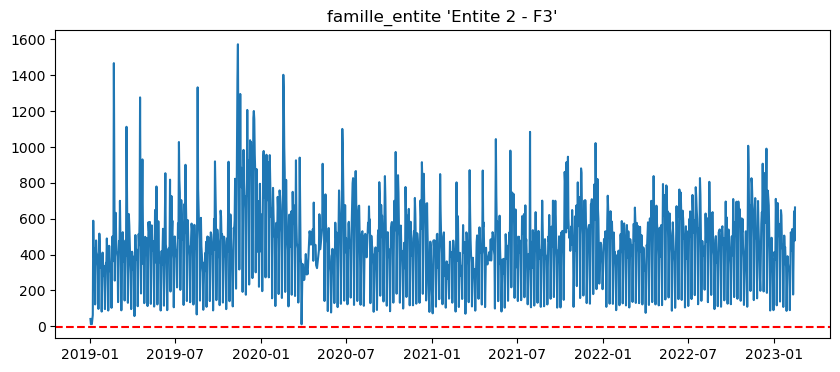

Pour la famille_entite 'Entite 3 - F2':
Test adf - p-value : 2.8312570886902624e-05
Stationnaire : True




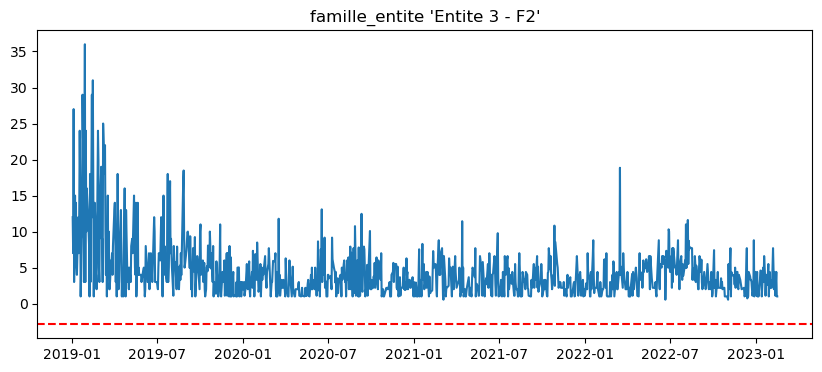

Pour la famille_entite 'Entite 3 - F5':
Test adf - p-value : 0.0017740538711738974
Stationnaire : True




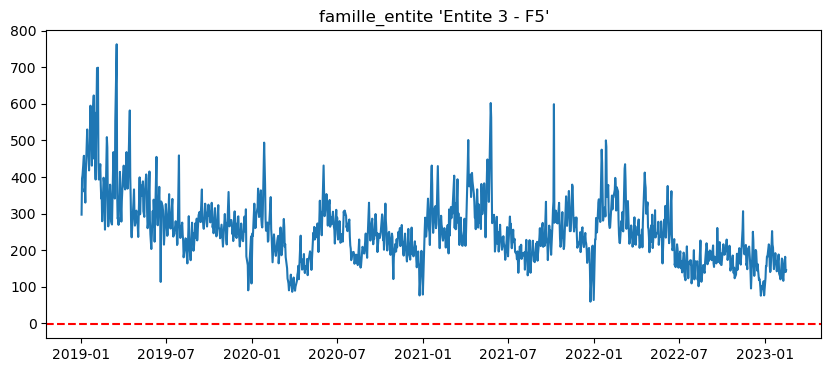

Pour la famille_entite 'Entite 3 - F7':
Test adf - p-value : 0.0020804751029833268
Stationnaire : True




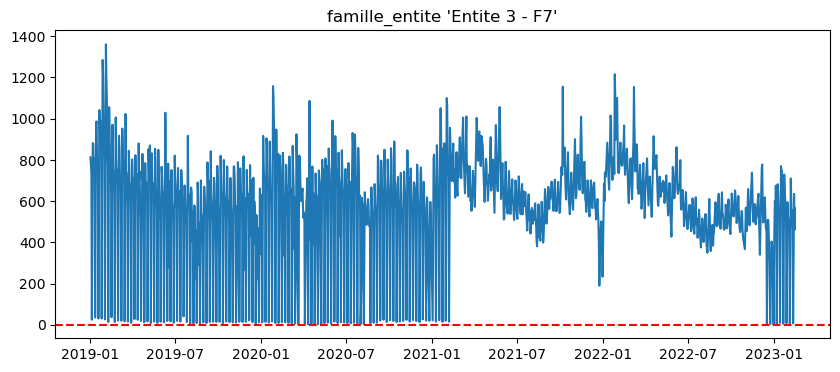

Pour la famille_entite 'Entite 4 - F5':
Test adf - p-value : 0.036468852326322694
Stationnaire : True




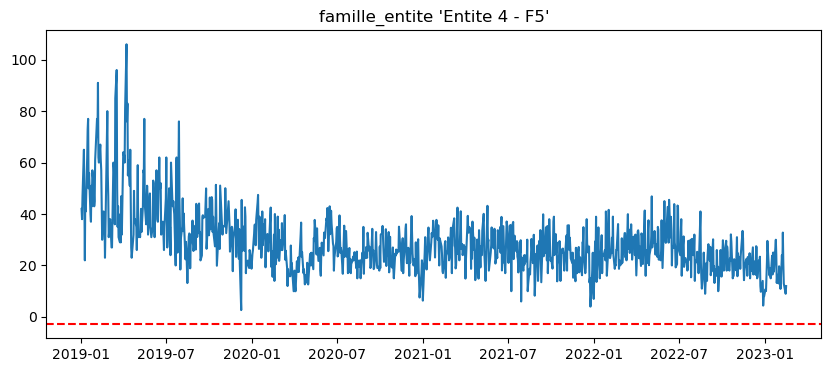

Pour la famille_entite 'Entite 4 - F7':
Test adf - p-value : 0.07592303658163659
Stationnaire : False




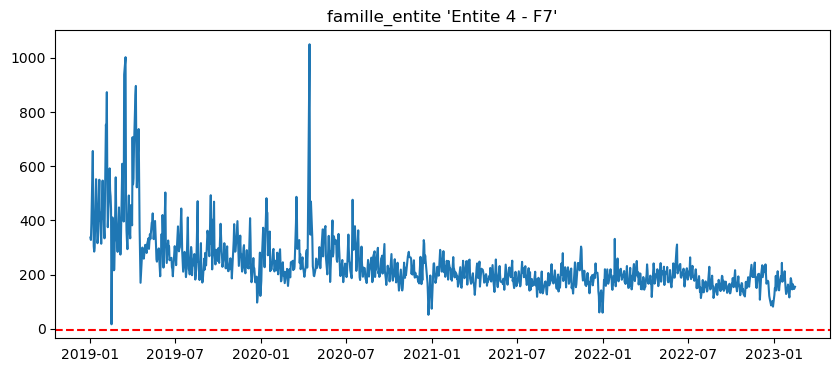

Pour la famille_entite 'Entite 5 - F1':
Test adf - p-value : 0.3914400515310984
Stationnaire : False




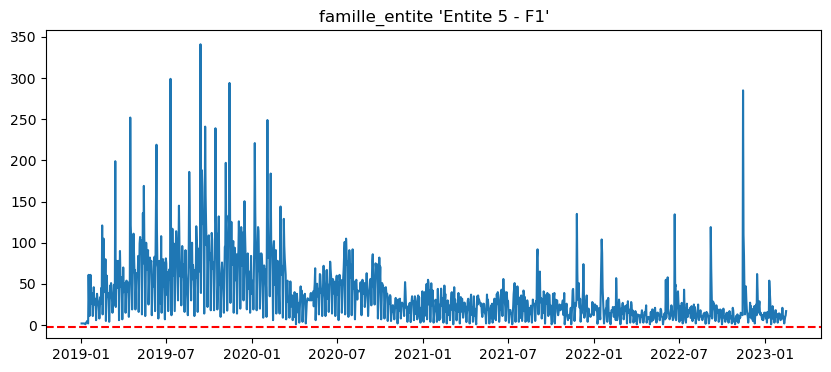

Pour la famille_entite 'Entite 5 - F2':
Test adf - p-value : 0.0224018417683063
Stationnaire : True




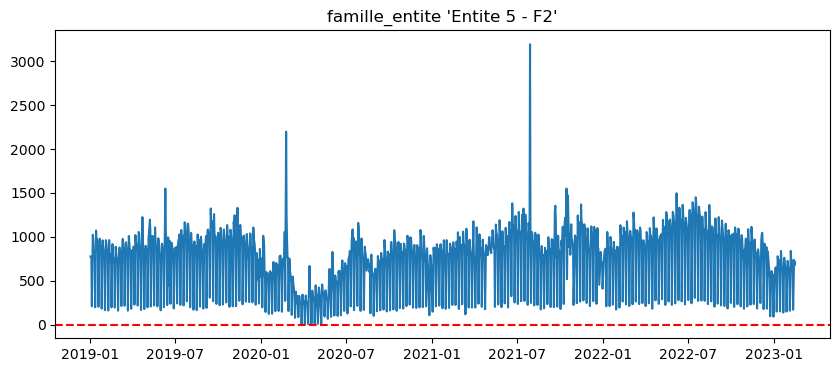

Pour la famille_entite 'Entite 5 - F3':
Test adf - p-value : 0.4457250105921095
Stationnaire : False




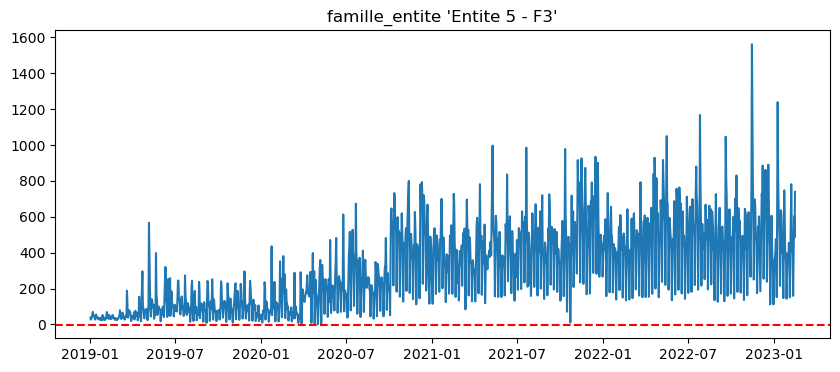

Pour la famille_entite 'Entite 5 - F5':
Test adf - p-value : 0.0006268594223061797
Stationnaire : True




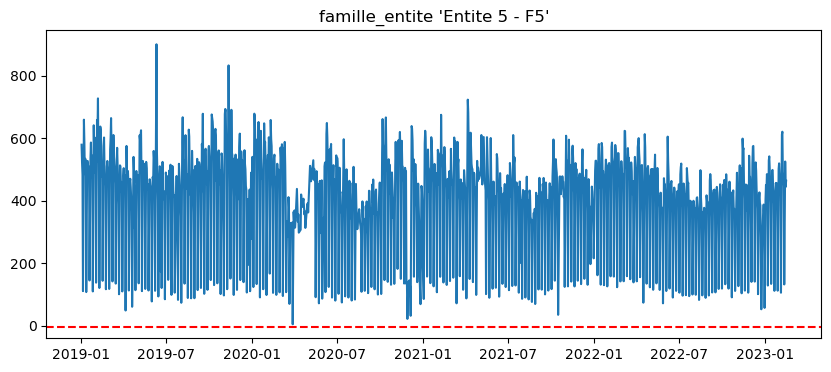

Pour la famille_entite 'Entite 5 - F6':
Test adf - p-value : 0.40767723667879857
Stationnaire : False




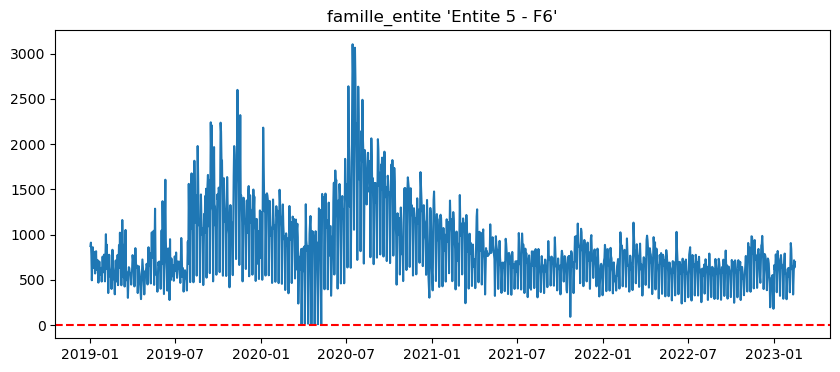

Pour la famille_entite 'Entite 5 - F7':
Test adf - p-value : 0.01523489675499172
Stationnaire : True




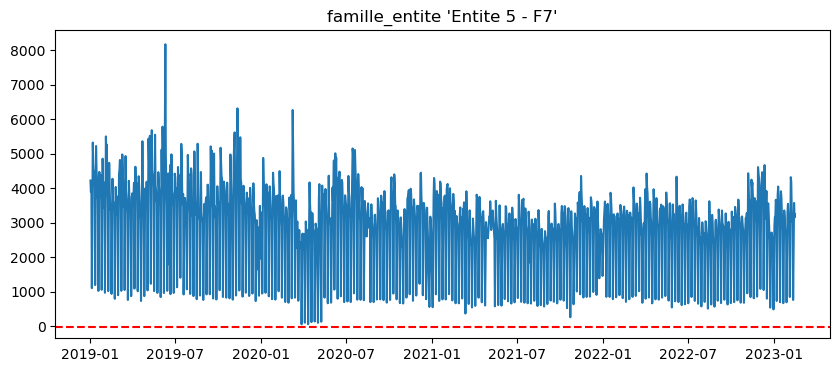

Pour la famille_entite 'Entite 1 - F1':
Test adf - p-value : 0.0008438702572081621
Stationnaire : True




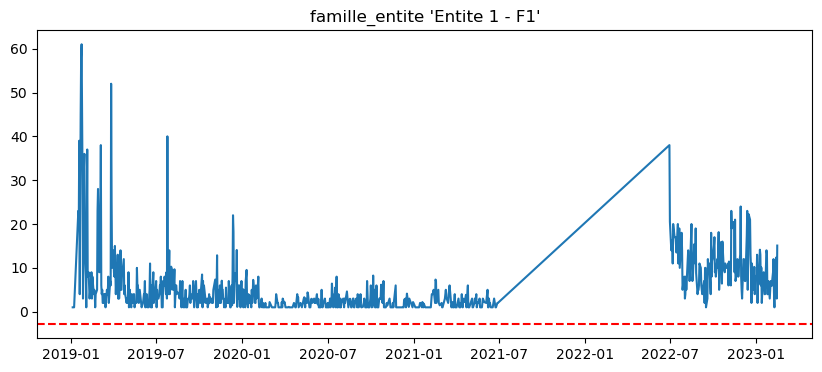

Pour la famille_entite 'Entite 2 - F5':
Test adf - p-value : 0.002450454698641062
Stationnaire : True




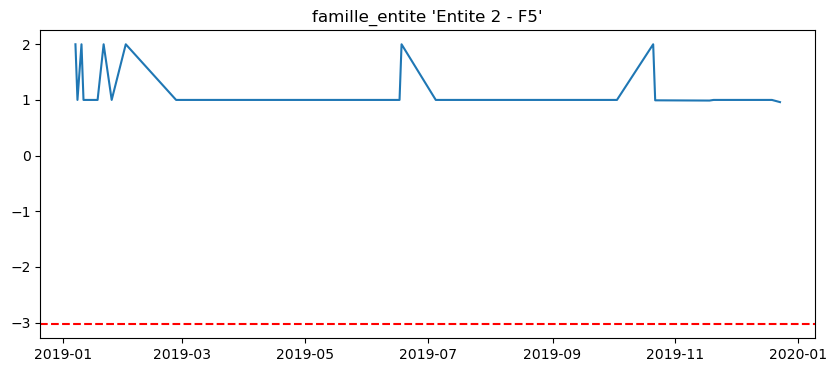

Pour la famille_entite 'Entite 4 - F1':
Test adf - p-value : 1.7787114939206526e-08
Stationnaire : True




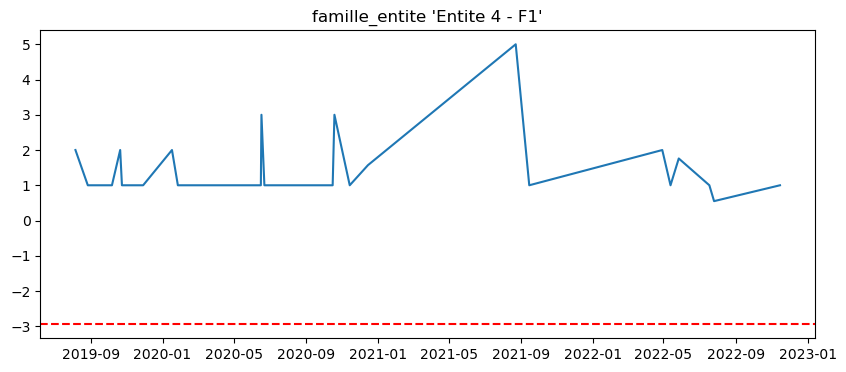

Familles stationnaires : ['Entite 1 - F2', 'Entite 1 - F4', 'Entite 1 - F6', 'Entite 2 - F1', 'Entite 2 - F2', 'Entite 2 - F3', 'Entite 3 - F2', 'Entite 3 - F5', 'Entite 3 - F7', 'Entite 4 - F5', 'Entite 5 - F2', 'Entite 5 - F5', 'Entite 5 - F7', 'Entite 1 - F1', 'Entite 2 - F5', 'Entite 4 - F1']
Familles non stationnaires : ['Entite 1 - F3', 'Entite 1 - F5', 'Entite 1 - F7', 'Entite 4 - F7', 'Entite 5 - F1', 'Entite 5 - F3', 'Entite 5 - F6']


In [14]:
familles = df_telephone["famille_entite"].unique()
list_stationnaire = []
list_nonstationnaire = []

for famille in familles:
    data = df_telephone[df_telephone["famille_entite"] == famille]["nombre_entrants_corrige"]
    
    # Test adf
    result = adfuller(data)
    p_value = result[1]
    is_stationary = p_value < 0.05
    
    # Affichage du résultat
    print(f"Pour la famille_entite '{famille}':")
    print(f"Test adf - p-value : {p_value}")
    print(f"Stationnaire : {is_stationary}")
    print("\n")
    
    # Ajout du nom de la famille à la liste correspondante
    if is_stationary:
        list_stationnaire.append(famille)
    else:
        list_nonstationnaire.append(famille)
    
    # Tracé de la série temporelle
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f"famille_entite '{famille}'")
    
    # Ajout de la ligne horizontale pour la valeur critique
    critical_value = result[4]["5%"]
    plt.axhline(critical_value, color='r', linestyle='--', linewidth=1.5)
    
    plt.show()

# Affichage des listes
print("Familles stationnaires :", list_stationnaire)
print("Familles non stationnaires :", list_nonstationnaire)


In [15]:
df_telephone_covid = df_telephone.loc["2021":]
familles = df_telephone_covid["famille_entite"].unique()
list_stationnaire_COVID = []
list_nonstationnaire_COVID = []
for famille in familles:
    data = df_telephone_covid[df_telephone_covid["famille_entite"] == famille]["nombre_entrants_corrige"]
    
    # Test adf
    result = adfuller(data)
    p_value = result[1]
    is_stationary = p_value < 0.05
    
    # Affichage du résultat
    print(f"Pour la famille_entite '{famille}':")
    print(f"Test adf - p-value : {p_value}")
    print(f"Stationnaire : {is_stationary}")
    print("\n")
    
    # Ajout du nom de la famille à la liste correspondante
    if is_stationary:
        list_stationnaire_COVID.append(famille)
    else:
        list_nonstationnaire_COVID.append(famille)

# Affichage des listes
print("Familles stationnaires :", list_stationnaire_COVID)
print("Familles non stationnaires :", list_nonstationnaire_COVID)

Pour la famille_entite 'Entite 1 - F2':
Test adf - p-value : 0.7434669859411565
Stationnaire : False


Pour la famille_entite 'Entite 1 - F3':
Test adf - p-value : 0.001602675562269759
Stationnaire : True


Pour la famille_entite 'Entite 1 - F5':
Test adf - p-value : 0.07291956349305623
Stationnaire : False


Pour la famille_entite 'Entite 1 - F6':
Test adf - p-value : 1.5787177136139186e-07
Stationnaire : True


Pour la famille_entite 'Entite 1 - F7':
Test adf - p-value : 3.4045883179482736e-06
Stationnaire : True


Pour la famille_entite 'Entite 2 - F1':
Test adf - p-value : 0.07187730993412568
Stationnaire : False


Pour la famille_entite 'Entite 2 - F2':
Test adf - p-value : 0.6164762940298247
Stationnaire : False


Pour la famille_entite 'Entite 2 - F3':
Test adf - p-value : 0.003527179401772795
Stationnaire : True


Pour la famille_entite 'Entite 3 - F2':
Test adf - p-value : 1.4978713327994242e-10
Stationnaire : True


Pour la famille_entite 'Entite 3 - F7':
Test adf - p-value :

In [16]:


if list_nonstationnaire == list_nonstationnaire_COVID:
    print("Les listes sont identiques.")
else: 
    print("les listes ne sont pas identiqUES")


les listes ne sont pas identiqUES


In [17]:
communs = list(set(list_nonstationnaire) & set(list_nonstationnaire_COVID))
print("Éléments communs :", communs)

Éléments communs : ['Entite 1 - F5']


In [18]:
print(len(list_nonstationnaire))
print(len(list_nonstationnaire_COVID))
print(len(list_stationnaire))
print(len(list_stationnaire_COVID))

7
8
16
14


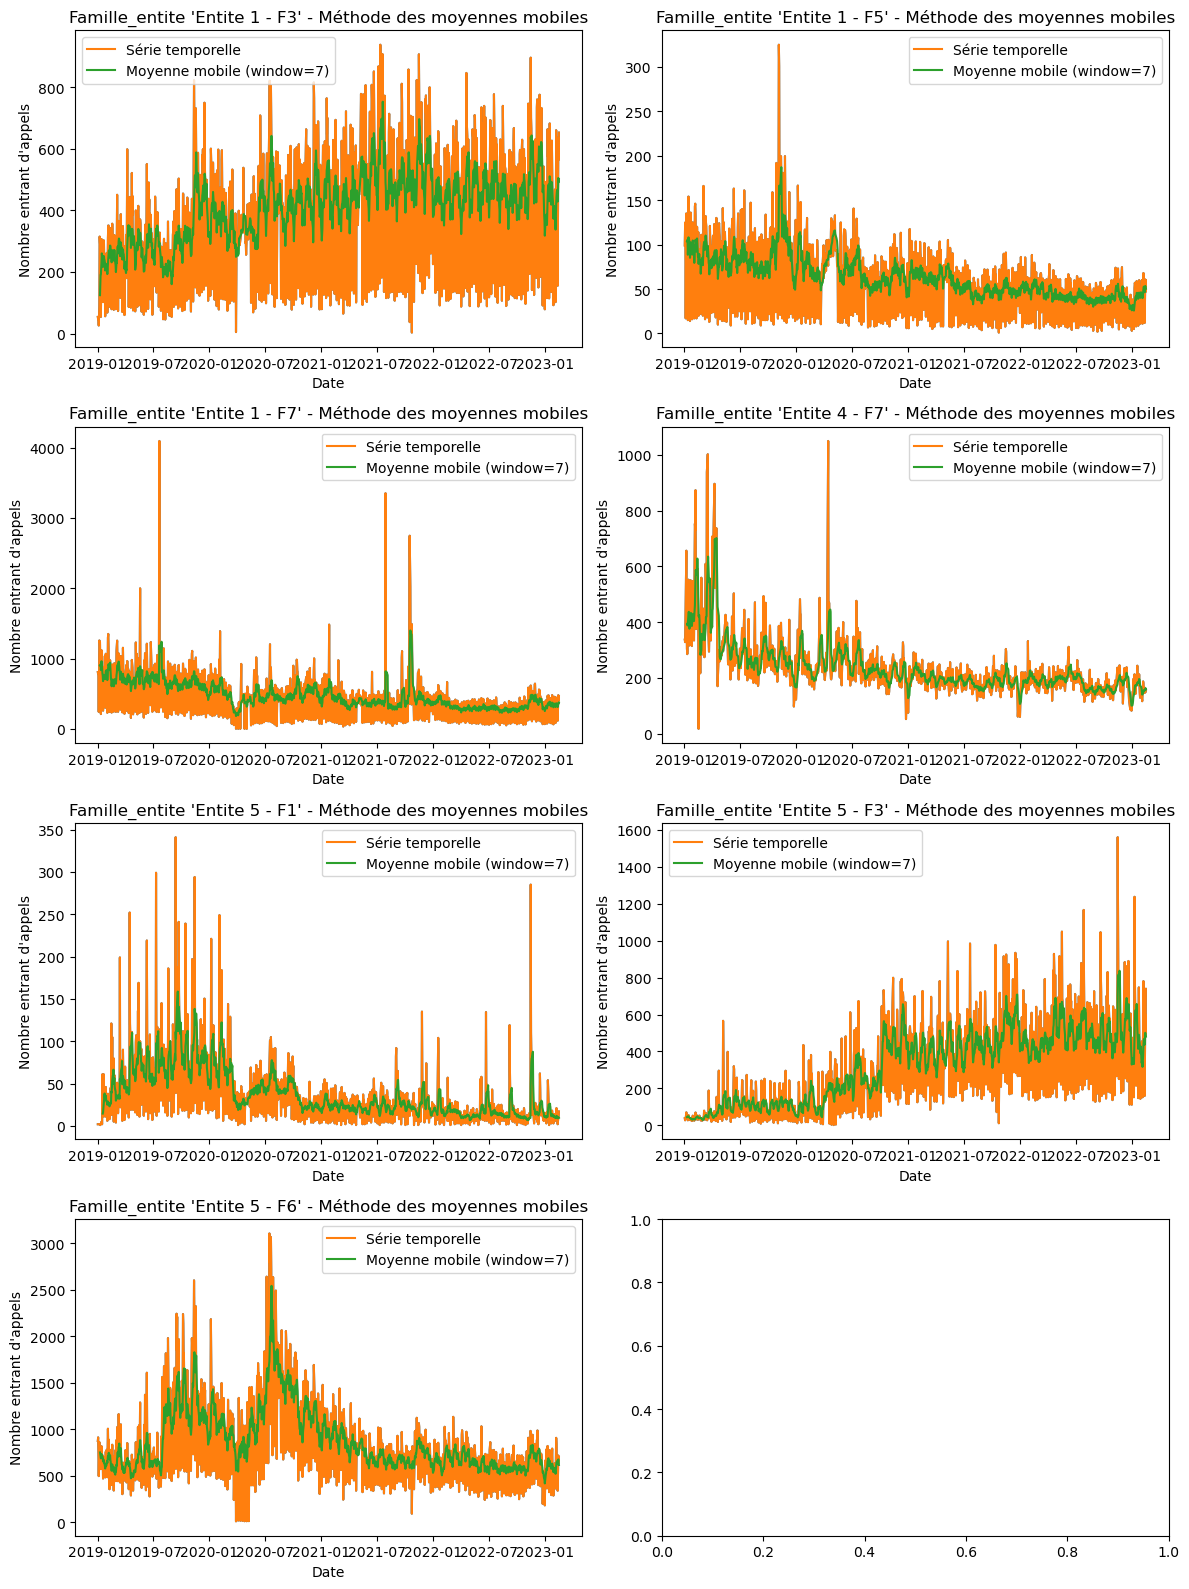

In [19]:


# Calcul du nombre de lignes et de colonnes du subplot
num_familles = len(list_nonstationnaire)
num_cols = 2  # 2 graphiques par ligne
num_rows = (num_familles + 1) // num_cols  # Arrondi supérieur

# Création du subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axs = axs.flatten()  # Aplatir les axes si nécessaire

# Boucle sur chaque famille_entite non stationnaire
for i, famille in enumerate(list_nonstationnaire):
    # Filtrage des données pour la famille_entite spécifique
    data = df_telephone[df_telephone['famille_entite'] == famille]['nombre_entrants_corrige']
    
    # Graphique de la série temporelle
    axs[i].plot(data)
    axs[i].set_title(f"Famille_entite '{famille}' - Série temporelle")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Nombre entrant d'appels")
    
    # Méthode des moyennes mobiles
    rolling_mean = data.rolling(window=7).mean()
    axs[i].plot(data, label="Série temporelle")
    axs[i].plot(rolling_mean, label="Moyenne mobile (window=7)")
    axs[i].set_title(f"Famille_entite '{famille}' - Méthode des moyennes mobiles")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Nombre entrant d'appels")
    axs[i].legend()

# # Supprimer les sous-plots vides s'il y en a
# if len(liste_nonstationnaire) < num_rows * num_cols:
#     for j in range(len(liste_nonstationnaire), num_rows * num_cols):
#         fig.delaxes(axs[j])

# Ajuster l'espacement entre les sous-plots
fig.tight_layout()

# Afficher le subplot
plt.show()


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning:

divide by zero encountered in divide



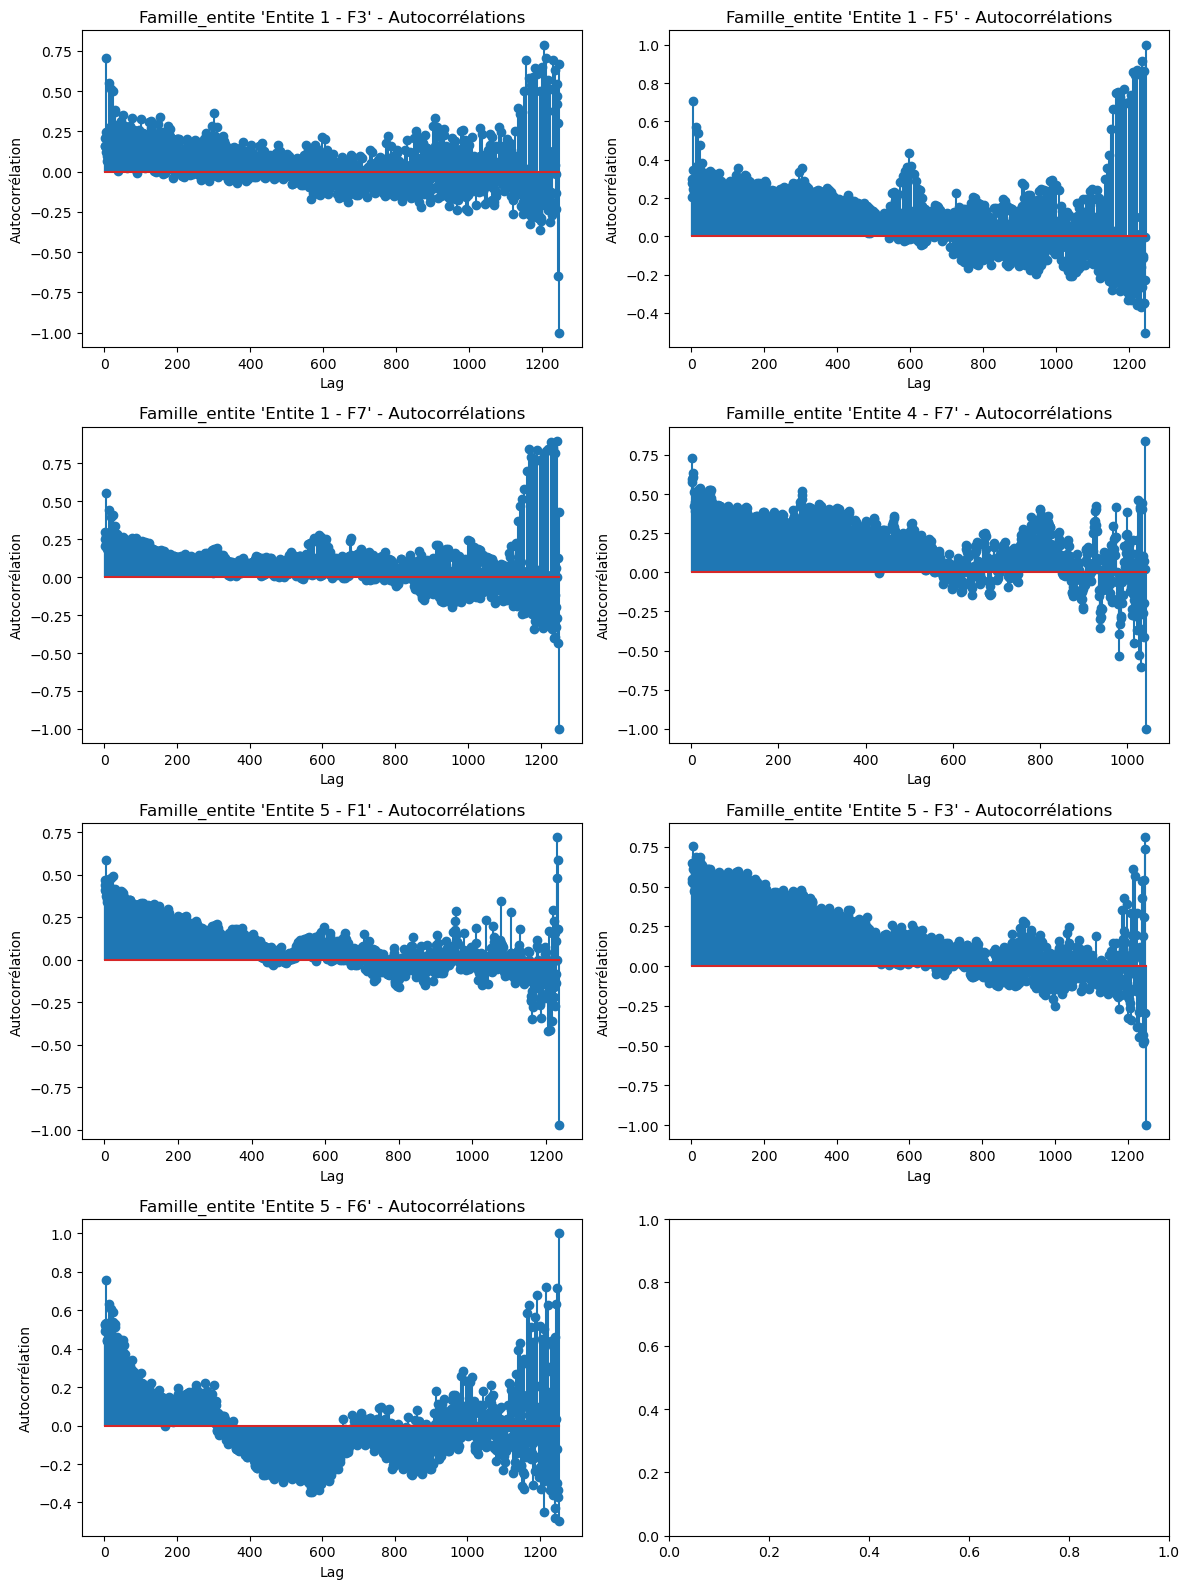

In [20]:


# Calcul du nombre de lignes et de colonnes du subplot
num_familles = len(list_nonstationnaire)
num_cols = 2  # 2 graphiques par ligne
num_rows = (num_familles + 1) // num_cols  # Arrondi supérieur

# Création du subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axs = axs.flatten()  # Aplatir les axes si nécessaire

# Boucle sur chaque famille_entite non stationnaire
for i, famille in enumerate(list_nonstationnaire):
    # Filtrage des données pour la famille_entite spécifique
    data = df_telephone[df_telephone['famille_entite'] == famille]['nombre_entrants_corrige']
    
    # Calcul des autocorrélations
    autocorrelation = data.autocorr()
    lags = len(data) - 1
    acf = np.zeros(lags)
    for j in range(lags):
        acf[j] = data.autocorr(lag=j+1)
    
    # Graphique des autocorrélations
    axs[i].stem(range(1, lags+1), acf, use_line_collection=True)
    axs[i].set_title(f"Famille_entite '{famille}' - Autocorrélations")
    axs[i].set_xlabel("Lag")
    axs[i].set_ylabel("Autocorrélation")

# # Supprimer les sous-plots vides s'il y en a
# if len(liste_nonstationnaire) < num_rows * num_cols:
#     for j in range(len(liste_nonstationnaire), num_rows * num_cols):
#         fig.delaxes(axs[j])

# Ajuster l'espacement entre les sous-plots
fig.tight_layout()

# Afficher le subplot
plt.show()


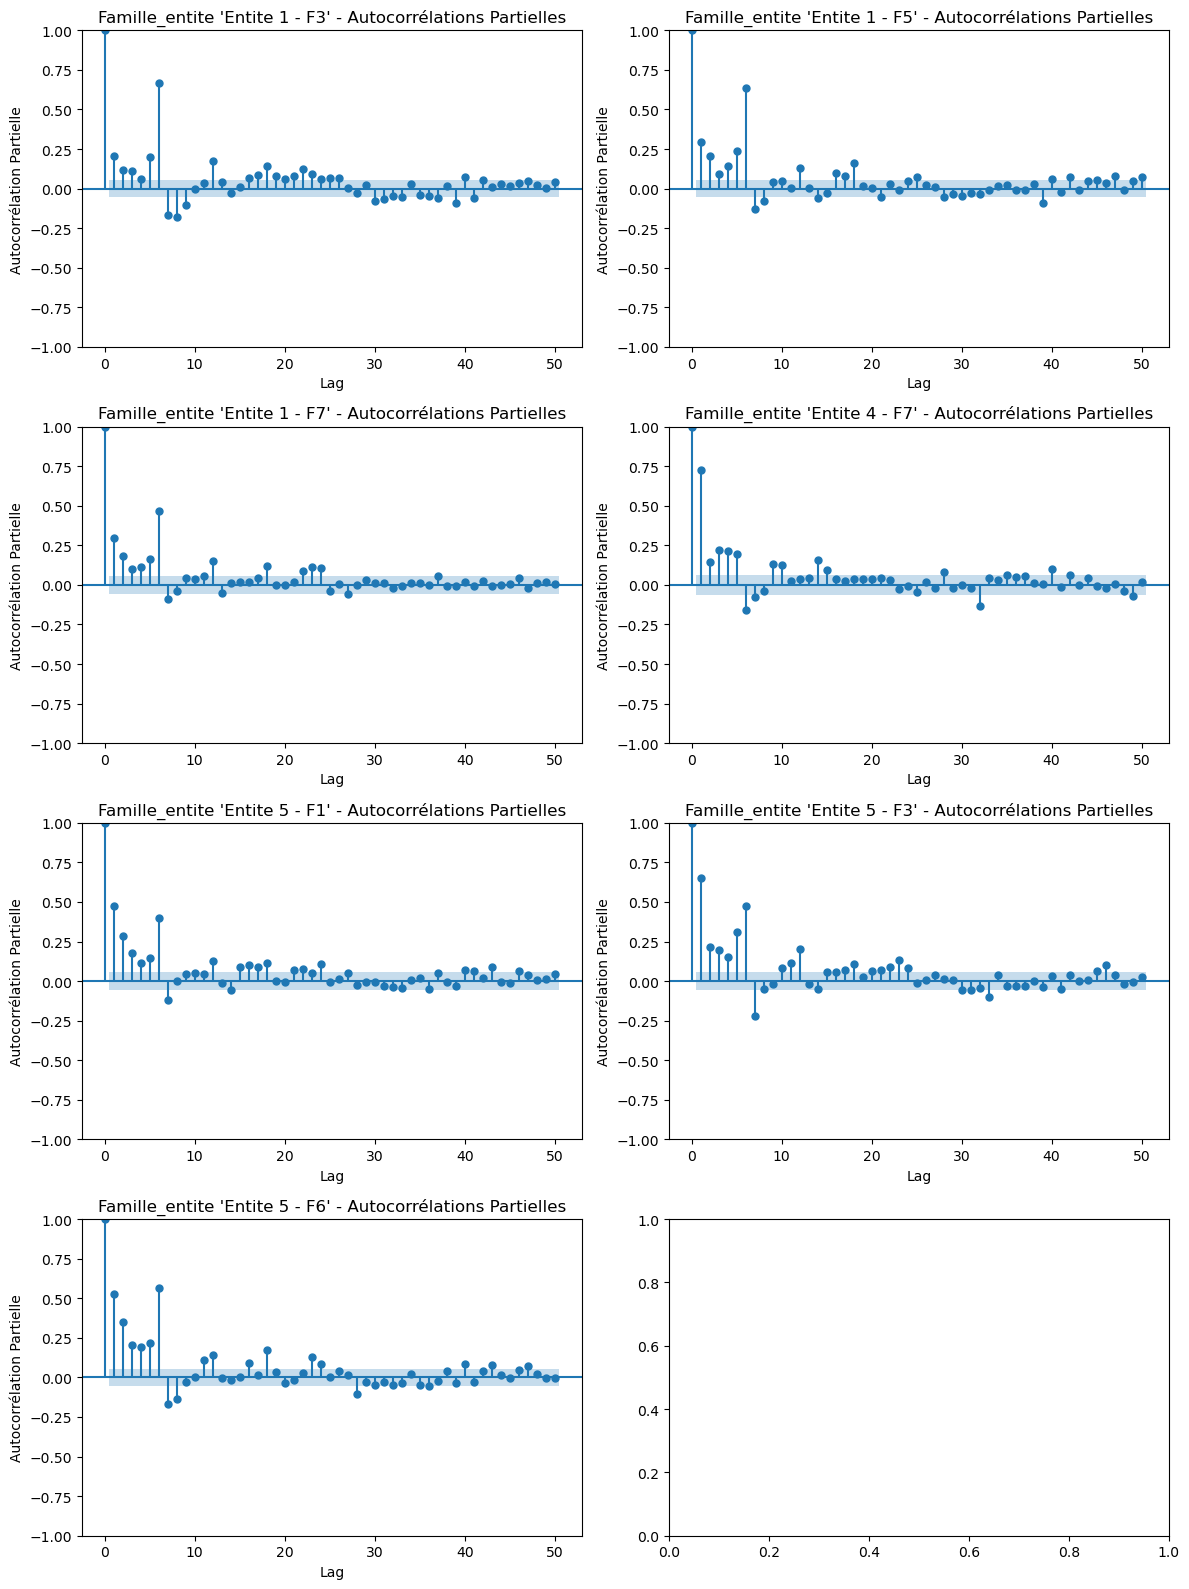

In [21]:

from statsmodels.graphics.tsaplots import plot_pacf



# Calcul du nombre de lignes et de colonnes du subplot
num_familles = len(list_nonstationnaire)
num_cols = 2  # 2 graphiques par ligne
num_rows = (num_familles + 1) // num_cols  # Arrondi supérieur

# Création du subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axs = axs.flatten()  # Aplatir les axes si nécessaire

# Boucle sur chaque famille_entite non stationnaire
for i, famille in enumerate(list_nonstationnaire):
    # Filtrage des données pour la famille_entite spécifique
    data = df_telephone[df_telephone['famille_entite'] == famille]['nombre_entrants_corrige']
    
    # Graphique des autocorrélations partielles
    plot_pacf(data, lags=min(len(data)-1, 50), ax=axs[i], method='ywm')
    axs[i].set_title(f"Famille_entite '{famille}' - Autocorrélations Partielles")
    axs[i].set_xlabel("Lag")
    axs[i].set_ylabel("Autocorrélation Partielle")

# # Supprimer les sous-plots vides s'il y en a
# if len(liste_nonstationnaire) < num_rows * num_cols:
#     for j in range(len(liste_nonstationnaire), num_rows * num_cols):
#         fig.delaxes(axs[j])

# Ajuster l'espacement entre les sous-plots
fig.tight_layout()

# Afficher le subplot
plt.show()


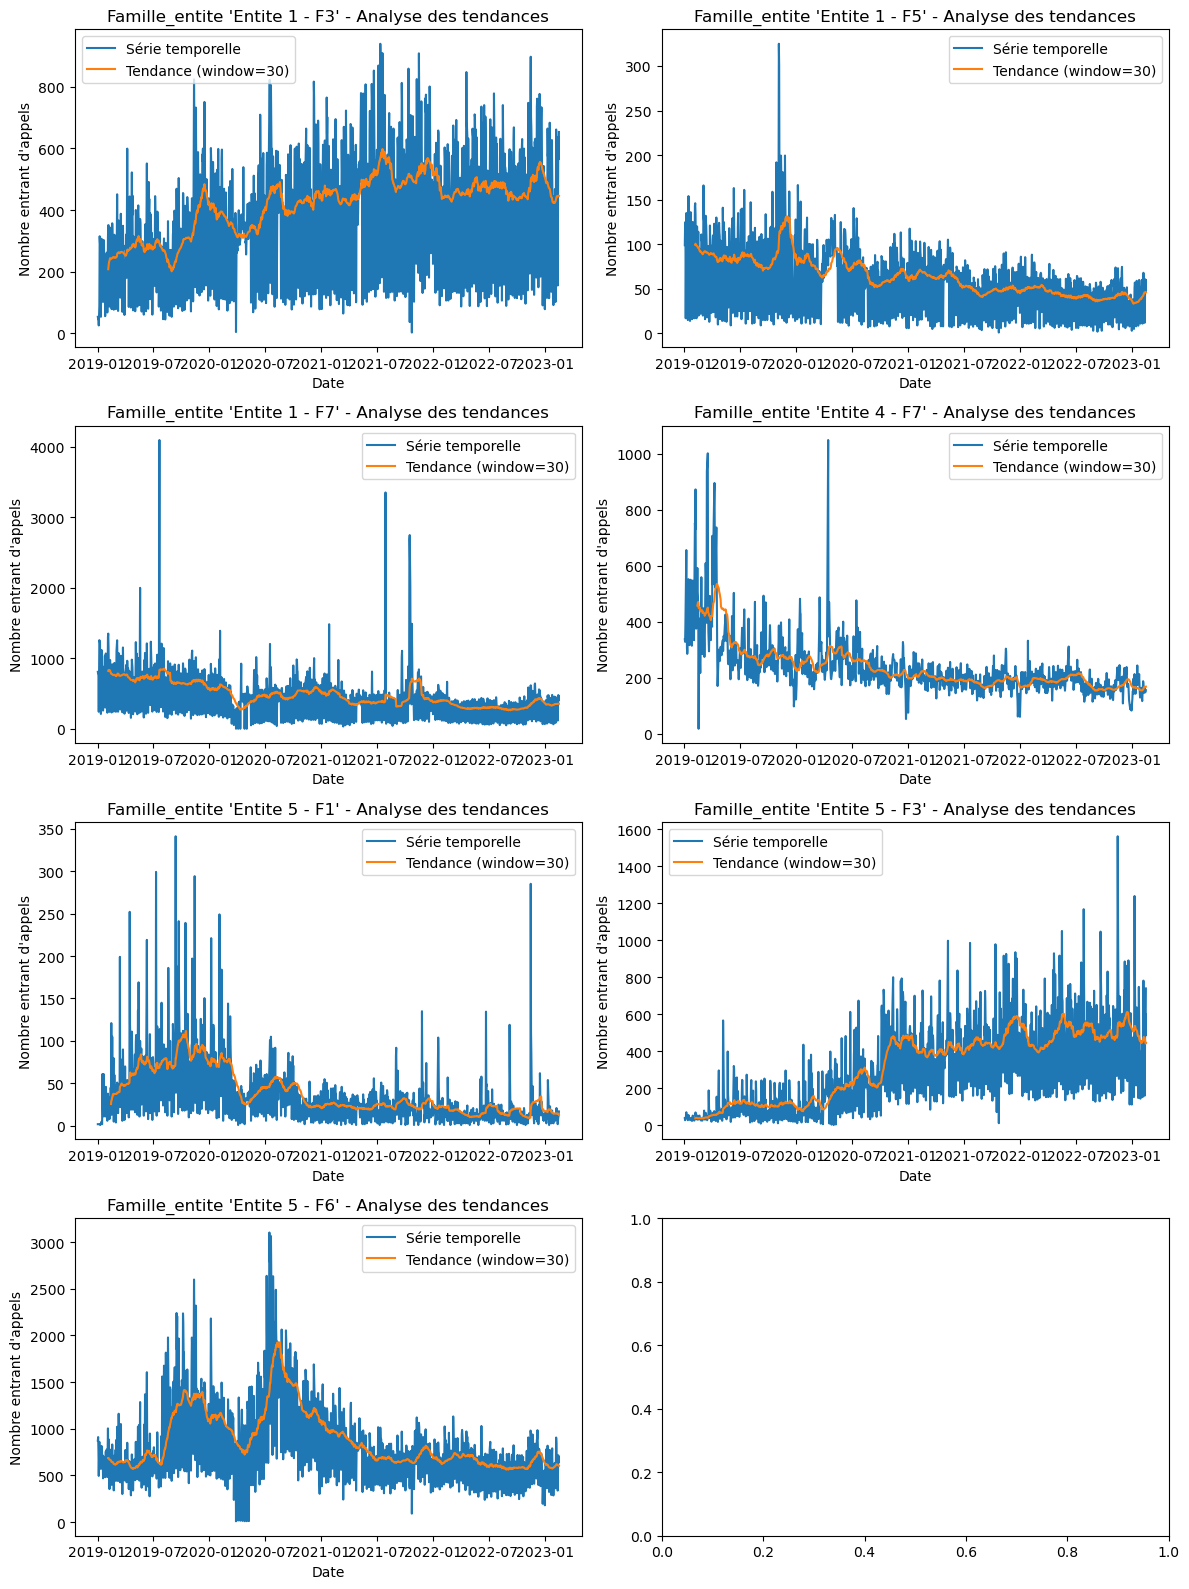

In [22]:


# Calcul du nombre de lignes et de colonnes du subplot
num_familles = len(list_nonstationnaire)
num_cols = 2  # 2 graphiques par ligne
num_rows = (num_familles + 1) // num_cols  # Arrondi supérieur

# Création du subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axs = axs.flatten()  # Aplatir les axes si nécessaire

# Boucle sur chaque famille_entite non stationnaire
for i, famille in enumerate(list_nonstationnaire):
    # Filtrage des données pour la famille_entite spécifique
    data = df_telephone[df_telephone['famille_entite'] == famille]['nombre_entrants_corrige']
    
    # Analyse des tendances
    trend = data.rolling(window=30).mean()  # Fenêtre de 30 jours pour l'analyse des tendances
    detrended = data - trend

    axs[i].plot(data, label="Série temporelle")
    axs[i].plot(trend, label="Tendance (window=30)")
    axs[i].set_title(f"Famille_entite '{famille}' - Analyse des tendances")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Nombre entrant d'appels")
    axs[i].legend()




# Ajuster l'espacement entre les sous-plots
fig.tight_layout()

# Afficher le subplot
plt.show()


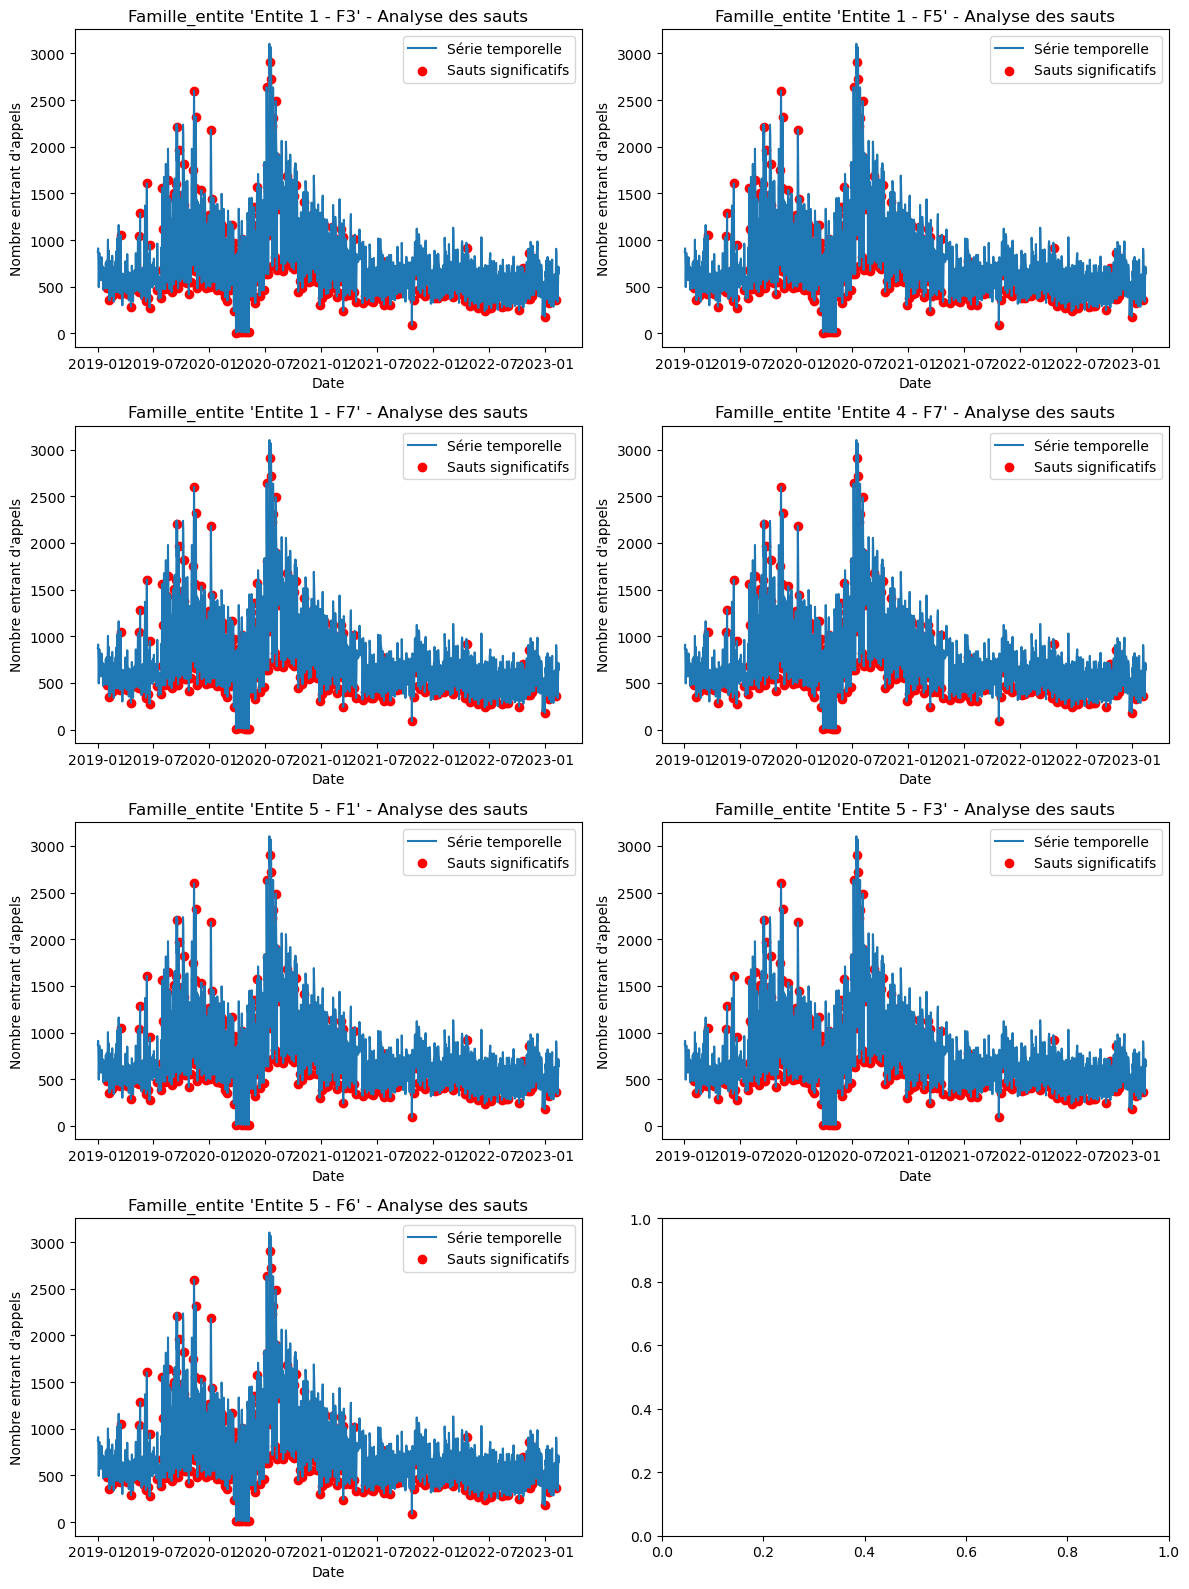

In [23]:
# Calcul du nombre de lignes et de colonnes du subplot
num_familles = len(list_nonstationnaire)
num_cols = 2  # 2 graphiques par ligne
num_rows = (num_familles + 1) // num_cols  # Arrondi supérieur

# Création du subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axs = axs.flatten()  # Aplatir les axes si nécessaire

# Boucle sur chaque famille_entite non stationnaire
for i, famille in enumerate(list_nonstationnaire):
    # Analyse des sauts
    diff = np.diff(data)
    jump_indices = np.where((diff > np.std(diff)) | (diff < -np.std(diff)))[0]
    jump_dates = data.iloc[jump_indices].index

    axs[i].plot(data, label="Série temporelle")
    axs[i].scatter(jump_dates, data.loc[jump_dates], c="red", label="Sauts significatifs")
    axs[i].set_title(f"Famille_entite '{famille}' - Analyse des sauts")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Nombre entrant d'appels")
    axs[i].legend()




# Ajuster l'espacement entre les sous-plots
fig.tight_layout()

# Afficher le subplot
plt.show()


In [24]:
df_telephone.columns

Index(['nombre_entrants_corrige', 'famille_entite'], dtype='object')

In [25]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

list_stationnaire_diff_1 = []
list_nonstationnaire_diff_1 = []

for famille_entite in list_nonstationnaire:
    # Extraction des données pour la famille_entite
    df_famille = df_telephone[df_telephone['famille_entite'] == famille_entite]

    # Différenciation
    differenced_series = df_famille['nombre_entrants_corrige'].diff(1)

    # Moyenne mobile
    window_size = 12  # Choisissez une taille de fenêtre appropriée
    rolling_mean = df_famille['nombre_entrants_corrige'].rolling(window=window_size).mean()

    # Test adf
    result = adfuller(differenced_series.dropna())  # Utilisation de la série différenciée sans les valeurs manquantes
    p_value = result[1]
    is_stationary = p_value < 0.05

    # Affichage du résultat
    print(f"Pour la famille_entite '{famille_entite}':")
    print(f"Test adf - p-value : {p_value}")
    print(f"Stationnaire : {is_stationary}")
    print("\n")

    # Ajout du nom de la famille à la liste correspondante
    if is_stationary:
        list_stationnaire_diff_1.append(famille_entite)
    else:
        list_nonstationnaire_diff_1.append(famille_entite)

    print("--------------------------------------")




Pour la famille_entite 'Entite 1 - F3':
Test adf - p-value : 1.8160196551667384e-28
Stationnaire : True


--------------------------------------
Pour la famille_entite 'Entite 1 - F5':
Test adf - p-value : 6.379351728949987e-21
Stationnaire : True


--------------------------------------
Pour la famille_entite 'Entite 1 - F7':
Test adf - p-value : 2.8052664459655684e-26
Stationnaire : True


--------------------------------------
Pour la famille_entite 'Entite 4 - F7':
Test adf - p-value : 1.8613870164913173e-22
Stationnaire : True


--------------------------------------
Pour la famille_entite 'Entite 5 - F1':
Test adf - p-value : 7.81528736454344e-26
Stationnaire : True


--------------------------------------
Pour la famille_entite 'Entite 5 - F3':
Test adf - p-value : 2.073129733390297e-28
Stationnaire : True


--------------------------------------
Pour la famille_entite 'Entite 5 - F6':
Test adf - p-value : 1.4327313509487759e-23
Stationnaire : True


----------------------------

In [26]:

print(list_nonstationnaire_diff_1)

[]


In [27]:
list_stationnaire_diff_7 =[]
list_nonstationnaire_diff_7 = []
threshold = 10
# Liste des familles_entite à traiter
familles_entite = df_telephone['famille_entite'].unique()

# Boucle sur chaque famille_entite
for famille_entite in familles_entite:
    # Sous-ensemble de données pour la famille_entite spécifique
    df_famille_entite = df_telephone[df_telephone['famille_entite'] == famille_entite].copy()

    # Vérification des dates manquantes pour la famille_entite spécifique
    start_date = df_famille_entite.index.min()
    end_date = df_famille_entite.index.max()

    if pd.isnull(start_date) or pd.isnull(end_date):
    # Gérer le cas où start_date ou end_date est NaT
         continue



    # Vérification des dates manquantes pour la famille_entite spécifique
    all_dates = pd.date_range(start=df_famille_entite.index.min(), end=df_famille_entite.index.max(), freq='D')
    missing_dates = all_dates[~all_dates.isin(df_famille_entite.index)]

    # Ajout de nouvelles lignes avec les dates manquantes pour la famille_entite spécifique
    if len(missing_dates) > 0:
        missing_rows = pd.DataFrame(index=missing_dates, columns=df_famille_entite.columns)
        df_famille_entite = pd.concat([df_famille_entite, missing_rows]).sort_index()

    # Différenciation avec une période de 7 jours pour la famille_entite spécifique
    df_famille_entite['diff_7'] = df_famille_entite['nombre_entrants_corrige'].diff(7)

    # Test de stationnarité pour la série différenciée
    if len(df_famille_entite['diff_7'].dropna()) > threshold:
        result = adfuller(df_famille_entite['diff_7'].dropna())
        is_saisonnale = p_value < 0.05
        print(f"Résultats pour la famille_entite {famille_entite}:")
        print(f"P value du test ADF : {result[1]}")
        print(f"Saisonnalité hebdommadaire : {is_saisonnale}")
        # Reste du code pour l'analyse de la série différenciée
    else:
        print(f"La taille de l'échantillon est insuffisante pour effectuer le test de stationnarité pour la famille_entite {famille_entite}.")
        # Ajout du nom de la famille à la liste correspondante
    if is_saisonnale:
        list_stationnaire_diff_7.append(famille_entite)
    else:
        list_nonstationnaire_diff_7.append(famille_entite)
    # Vous pouvez faire d'autres traitements ou analyses spécifiques à chaque famille_entite ici


Résultats pour la famille_entite Entite 1 - F2:
P value du test ADF : 1.5671483293105276e-18
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 1 - F3:
P value du test ADF : 2.5521709127022015e-29
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 1 - F4:
P value du test ADF : 3.7933685963181415e-07
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 1 - F5:
P value du test ADF : 3.1233188029045015e-12
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 1 - F6:
P value du test ADF : 7.679365104857772e-13
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 1 - F7:
P value du test ADF : 2.8185051696977337e-18
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 2 - F1:
P value du test ADF : 3.0752094548560137e-12
Saisonnalité hebdommadaire : True
Résultats pour la famille_entite Entite 2 - F2:
P value du test ADF : 1.3371100202038059e-08
Saisonnalité hebdom

<Figure size 1000x400 with 0 Axes>

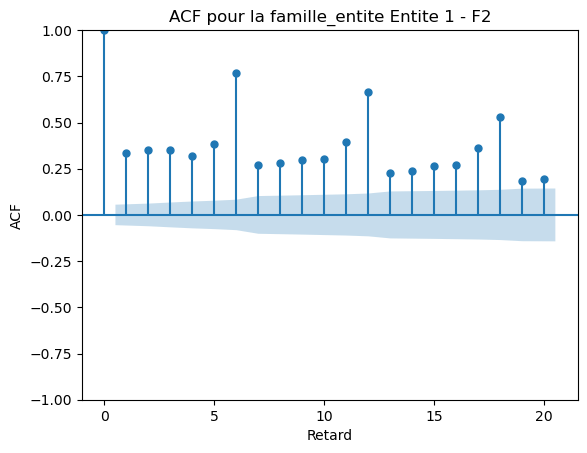

<Figure size 1000x400 with 0 Axes>

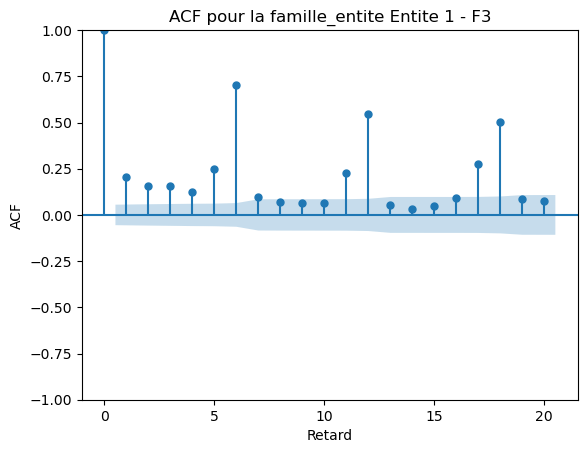

<Figure size 1000x400 with 0 Axes>

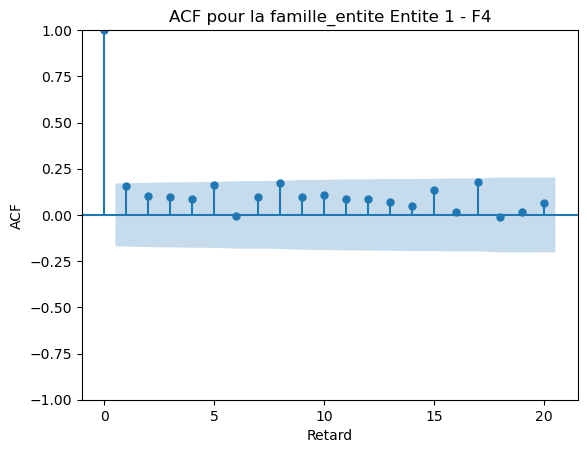

<Figure size 1000x400 with 0 Axes>

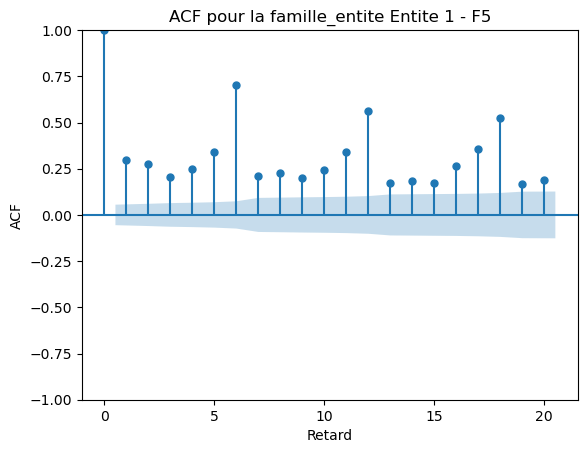

<Figure size 1000x400 with 0 Axes>

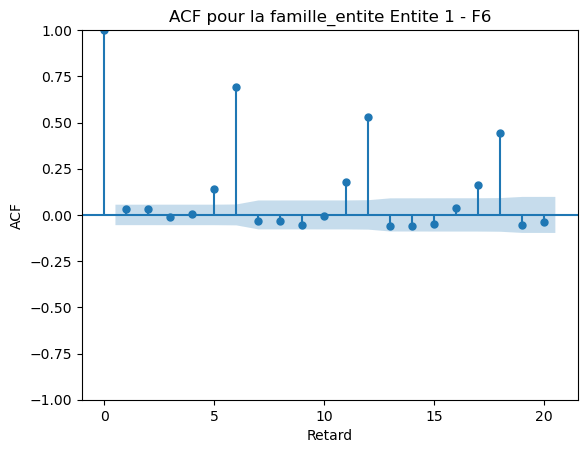

<Figure size 1000x400 with 0 Axes>

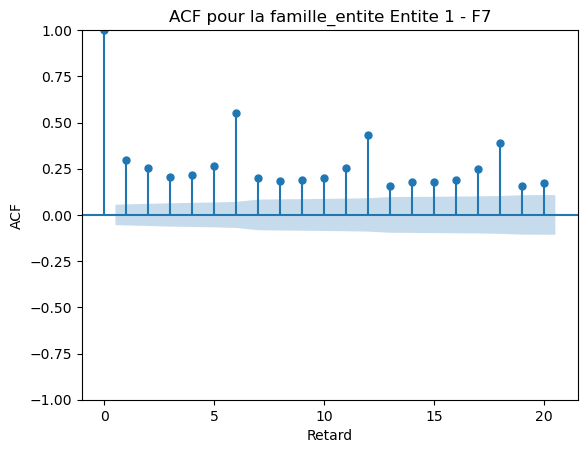

<Figure size 1000x400 with 0 Axes>

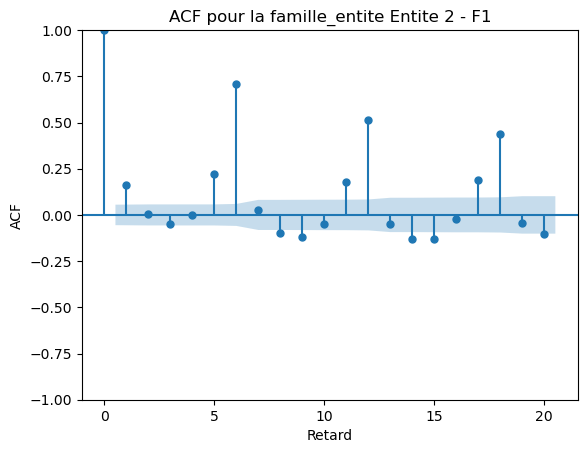

<Figure size 1000x400 with 0 Axes>

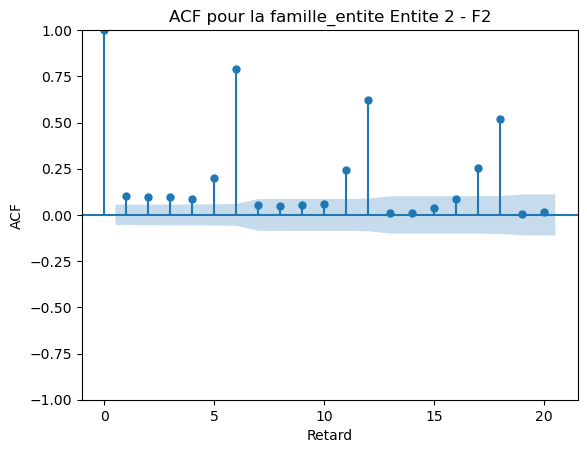

<Figure size 1000x400 with 0 Axes>

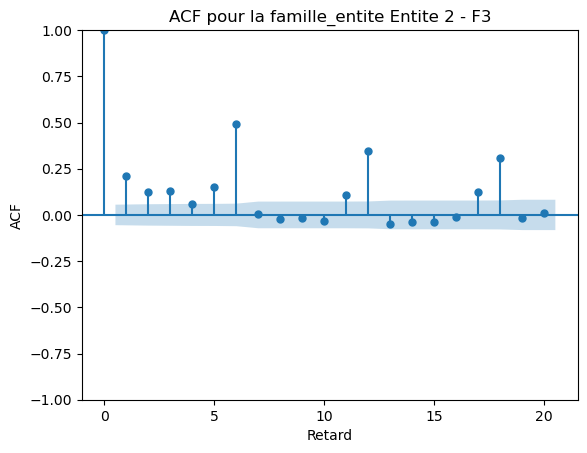

<Figure size 1000x400 with 0 Axes>

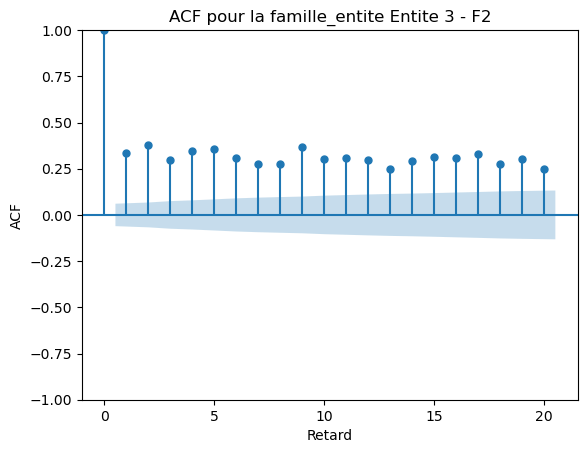

<Figure size 1000x400 with 0 Axes>

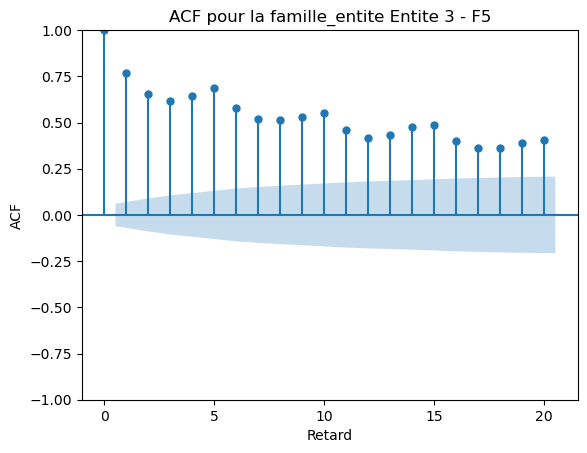

<Figure size 1000x400 with 0 Axes>

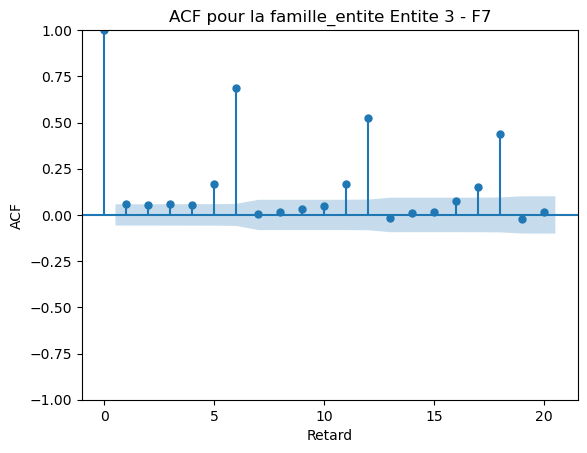

<Figure size 1000x400 with 0 Axes>

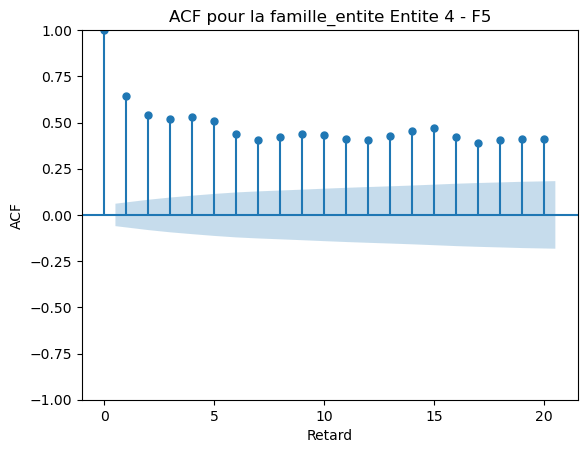

<Figure size 1000x400 with 0 Axes>

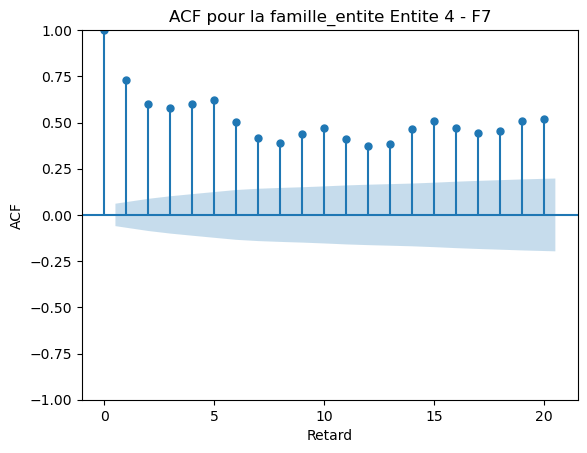

<Figure size 1000x400 with 0 Axes>

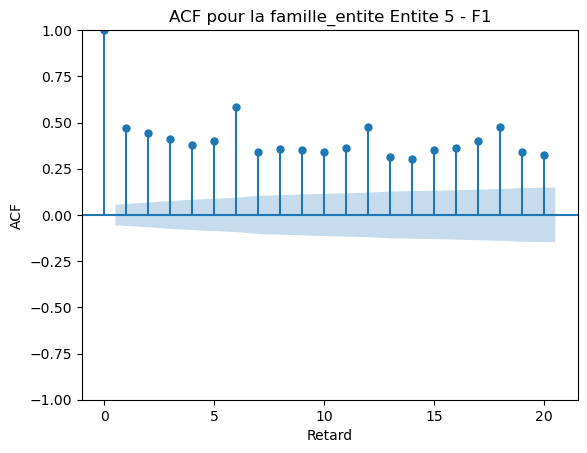

<Figure size 1000x400 with 0 Axes>

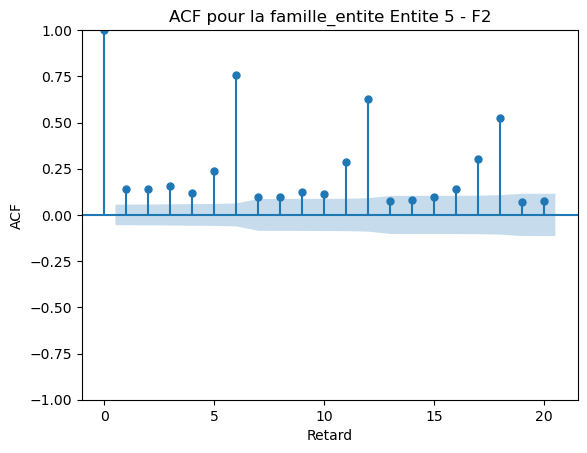

<Figure size 1000x400 with 0 Axes>

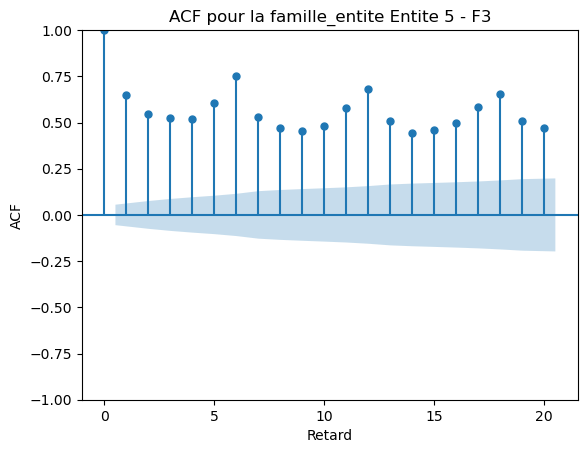

<Figure size 1000x400 with 0 Axes>

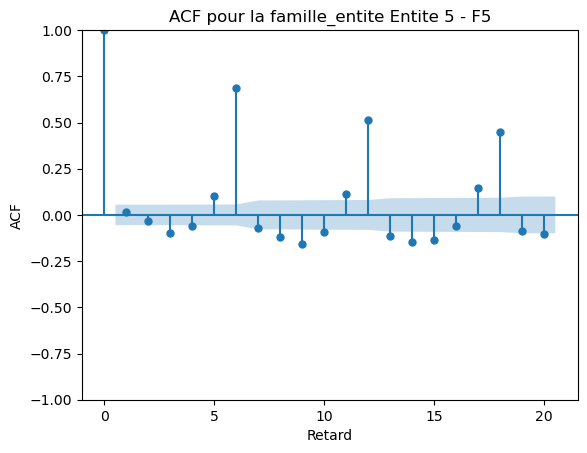

<Figure size 1000x400 with 0 Axes>

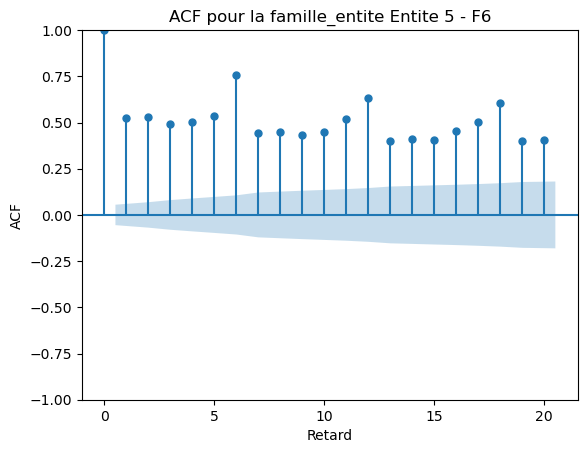

<Figure size 1000x400 with 0 Axes>

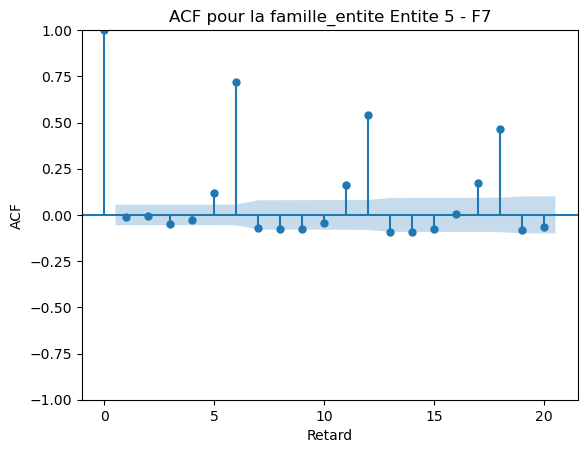

<Figure size 1000x400 with 0 Axes>

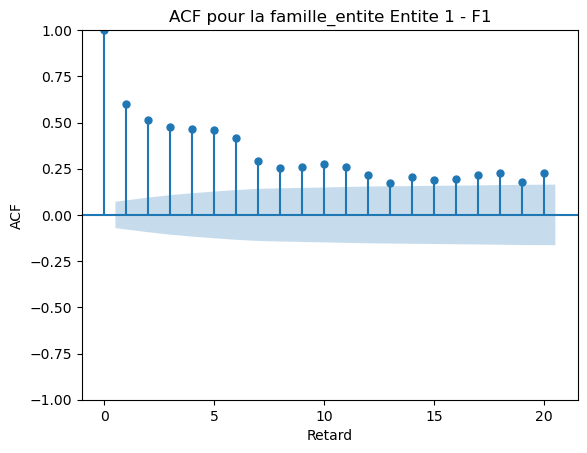

<Figure size 1000x400 with 0 Axes>

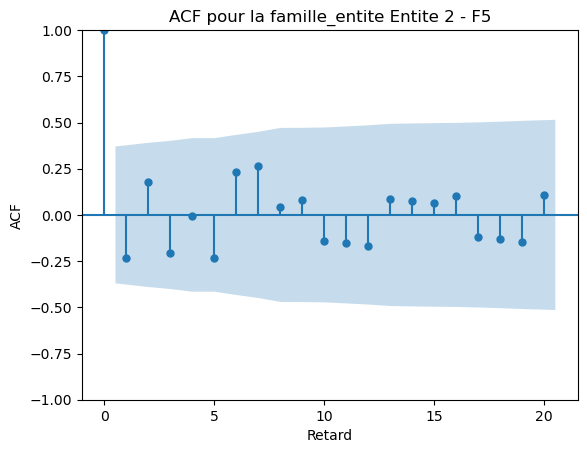

<Figure size 1000x400 with 0 Axes>

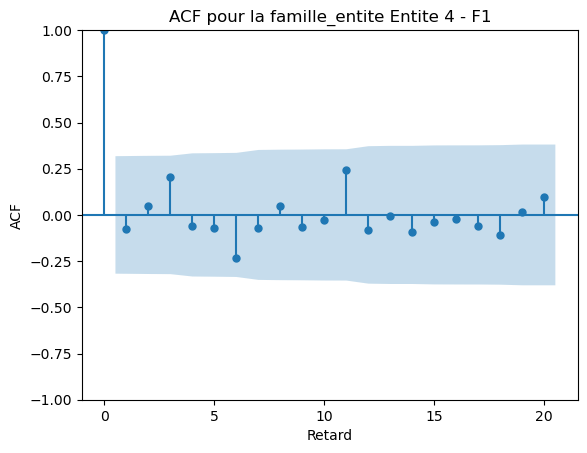

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

familles_entite = df_telephone['famille_entite'].unique()

for famille_entite in familles_entite:
    # Filtrer les données pour la famille_entite spécifique
    df_famille_entite = df_telephone[df_telephone['famille_entite'] == famille_entite]

    # Tracer l'ACF
    plt.figure(figsize=(10, 4))
    plot_acf(df_famille_entite['nombre_entrants_corrige'], lags=20)
    plt.xlabel('Retard')
    plt.ylabel('ACF')
    plt.title(f"ACF pour la famille_entite {famille_entite}")
    plt.show()




In [29]:
# import itertools
# import statsmodels.api as sm

# # Liste des valeurs possibles pour p, d et q
# p_values = range(1, 5)  # Choisissez la plage appropriée pour p
# d_values = [1]  # Différenciation d'ordre 1 pour la tendance
# q_values = range(1, 5)  # Choisissez la plage appropriée pour q

# # Grid Search pour chaque famille_entite
# for famille_entite in df_telephone['famille_entite'].unique():
#     df_famille_entite = df_telephone[df_telephone['famille_entite'] == famille_entite]
#     best_aic = float("inf")
#     best_order = None
    
#     # Parcours de toutes les combinaisons possibles de p, d et q
#     for p, d, q in itertools.product(p_values, d_values, q_values):
#         try:
#             model = sm.tsa.SARIMAX(df_famille_entite['nombre_entrants_corrige'], order=(p, d, q))
#             results = model.fit(disp=False)
#             aic = results.aic
            
#             # Mise à jour des meilleures valeurs de p, d et q si l'AIC est meilleur
#             if aic < best_aic:
#                 best_aic = aic
#                 best_order = (p, d, q)
        
#         except:
#             continue
    
#     # Affichage des résultats pour chaque famille_entite
#     print(f"Meilleur ordre (p, d, q) pour la famille_entite {famille_entite}: {best_order}")
#     print(f"AIC correspondant : {best_aic}")


In [30]:
# import warnings
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# warnings.filterwarnings("ignore")  # Ignorer les avertissements

# # Liste pour stocker les résultats
# results = []

# # Parcourir chaque famille_entite
# for famille_entite in df_telephone['famille_entite'].unique():
#     df_entite = df_telephone[df_telephone['famille_entite'] == famille_entite].copy()

#     # Vérifier s'il y a suffisamment de données pour ajuster le modèle
#     if len(df_entite) < 10:
#         continue

#     # Vérifier la stationnarité
#     d = 1 if famille_entite in list_nonstationnaire else 0

#     # Recherche du meilleur ordre (p, q)
#     best_aic = float("inf")
#     best_order = None
    
#     for p in range(3):
#         for q in range(3):
#             try:
#                 model = SARIMAX(df_entite['nombre_entrants_corrige'], order=(p, d, q))
#                 result = model.fit()
#                 aic = result.aic
#                 if aic < best_aic:
#                     best_aic = aic
#                     best_order = (p, d, q)
#             except:
#                 continue
            
#     # Stocker les résultats
#     results.append((famille_entite, best_order, best_aic))

# # Trier les résultats par ordre croissant d'AIC
# results.sort(key=lambda x: x[2])

# # Afficher les meilleurs ordres (p, d, q) et les valeurs d'AIC correspondantes
# for result in results:
#     famille_entite, order, aic = result
#     print(f"Meilleur ordre (p, d, q) pour la famille_entite {famille_entite}: {order}")
#     print(f"AIC correspondant: {aic}")
#     print()



In [31]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [32]:
# # Function to fit ARIMA model for each 'famille_entite'
# def fit_arima(famille_entite, data):
#     model = pm.auto_arima(data,
#                           start_p=1,
#                           start_q=1,
#                           test='adf',
#                           max_p=3,
#                           max_q=3,
#                           m=30,
#                           seasonal=True,
#                           D=1,
#                           d=None,
#                           trace=True,
#                           error_action='ignore',
#                           suppress_warnings=True,
#                           stepwise=True)
#     print(f"Summary for famille_entite: {famille_entite}")
#     print(model.summary())
#     return model

# # Initialize a dictionary to store the MAPE values for each model
# mape_dict = {}

# # Group by 'famille_entite' and fit ARIMA model for each group
# for famille_entite, data_famille_entite in df_telephone.groupby(['famille_entite']):
#     serie = data_famille_entite['nombre_entrants_corrige']
#     model = fit_arima(famille_entite, serie)
#     y_pred = model.predict(n_periods=len(data_famille_entite))
#     mape = np.mean(np.abs((data_famille_entite['nombre_entrants_corrige'] - y_pred) / data_famille_entite['nombre_entrants_corrige'])) * 100
#     # Store the MAPE value in the dictionary
#     mape_dict[famille_entite] = mape
    
#     # Plot the predicted and actual values
#     plt.figure(figsize=(10, 6))
#     plt.plot(data_famille_entite.index, data_famille_entite['nombre_entrants_corrige'], label='Actual')
#     plt.plot(data_famille_entite.index, y_pred, label='Predicted')
#     plt.title(f"Famille_Entite: {famille_entite}")
#     plt.xlabel('Index temporel')
#     plt.ylabel('Nombre d\'appels')
#     plt.legend()
#     plt.show()

# # Print the MAPE values for each famille_entite
# for famille_entite, mape in mape_dict.items():
#     print(f"Famille_Entite: {famille_entite}, MAPE: {mape}")




In [33]:
# Function to fit ARIMA model for each 'famille_entite'
def fit_arima(famille_entite, data):
    model = pm.auto_arima(data,
                          start_p=1,
                          start_q=1,
                          test='adf',
                          max_p=3,
                          max_q=3,
                          m=30,
                          seasonal=True,
                          D=1,
                          d=None,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
    print(f"Summary for famille_entite: {famille_entite}")
    print(model.summary())
    return model

# Initialize a dictionary to store the MAPE values for each model
mape_dict = {}

# Group by 'famille_entite' and fit ARIMA model for each group
for famille_entite, data_famille_entite in df_telephone.groupby('famille_entite'):
    serie = data_famille_entite['nombre_entrants_corrige']
    model = fit_arima(famille_entite, serie)
    y_pred = model.predict(n_periods=len(data_famille_entite))
    mape = np.mean(np.abs((data_famille_entite['nombre_entrants_corrige'] - y_pred) / data_famille_entite['nombre_entrants_corrige'])) * 100
    # Store the MAPE value in the dictionary
    mape_dict[famille_entite] = mape
    
    # Plot the predicted and actual values
    plt.figure(figsize=(10, 6))
    plt.plot(data_famille_entite.index, data_famille_entite['nombre_entrants_corrige'], label='Actual')
    plt.plot(data_famille_entite.index, y_pred, label='Predicted')
    plt.title(f"Famille_Entite: {famille_entite}")
    plt.xlabel('Index temporel')
    plt.ylabel('Nombre d\'appels')
    plt.legend()
    plt.show()

# Print the MAPE values for each famille_entite
for famille_entite, mape in mape_dict.items():
    print(f"Famille_Entite: {famille_entite}, MAPE: {mape}")


Performing stepwise search to minimize aic
